## Import

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Leitura dos dados

In [214]:
# Leitura dos dados
dados = pd.read_csv('./train.csv')

# Guardei para testar no fim
y_comparar_fim = dados[['Survived']]

# Análise dos dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f702c7e6358>]],
      dtype=object)

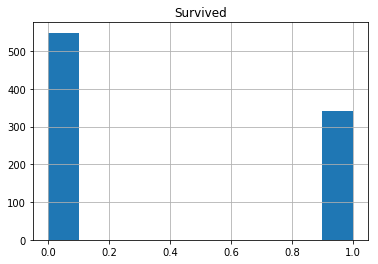

In [215]:
# Gráfico dos Sobreviventes
dados.hist('Survived')

In [216]:
# Ver os dados
dados.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Deu para observar que a coluna "sex" não temos número

In [217]:
#Função converter Sexo
# Male = 0
# Female = 1

def sex(x):
    if x.lower() == 'female':
        return 1
    elif x.lower() == 'male':
        return 0

#Aplicar
dados['Sex'] = dados['Sex'].apply(sex)

In [218]:
dados.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q


Podemos descartar:
- Passengerid
- Name
- Ticket
- Cabin

In [219]:
RETIRAR = ['PassengerId','Name','Ticket','Cabin']

dados.drop(RETIRAR,axis=1,inplace = True)

In [220]:
dados.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


Temos ainda uma escala chamada Embarked, podessos passar para número e ver se existe alguma correlação com os sobreviventes

In [221]:
dados = pd.get_dummies(dados)

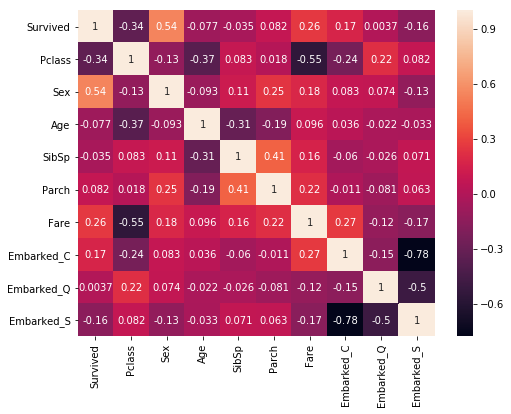

In [222]:
# Gráfico de Correlação entre as colunas
plt.figure(figsize=(8,6))
sns.heatmap(dados.corr(),annot = True)

Apesar do Embarked_C ter relação de 0.17 com o Survived, não iremos utilizar, pois olhando pelo Embarked_C, ele não apresenta grante relação com os outros parâmetros...

por esse mesmo motivo irei retirar as classes SibSp e Partch

In [223]:
UTILIZADOS = ['Survived','Pclass','Sex','Age','Fare']

dados = dados[UTILIZADOS]

In [224]:
dados.head(4)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000


Análise das idades com as classes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f702c555978>,
      dtype=object)

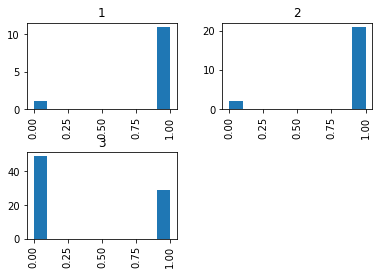

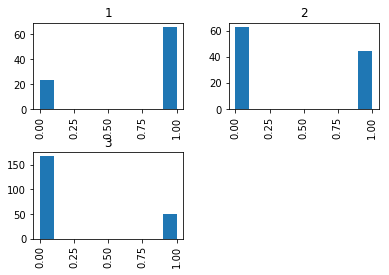

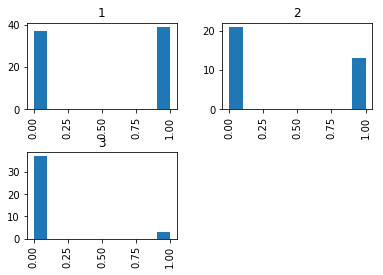

In [225]:
kid = dados[dados['Age'] < 18]
mediam = dados[(dados['Age'] > 18) & (dados['Age'] < 40 )]
old = dados[dados['Age'] > 40]

kid.hist(column = 'Survived',by = 'Pclass')
mediam.hist(column = 'Survived',by = 'Pclass')
old.hist(column = 'Survived',by = 'Pclass')

Dos gráficos acima é ṕossível observar os favorecidos:
- Crianças das Classes 1 e 2
- Adultos da Classe 1

Talvez está relacionado com a posição das classes no navio.

##### Procurar por valores null

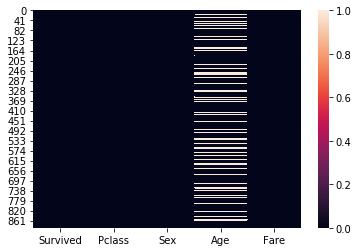

In [226]:
sns.heatmap(dados.isnull())

A idade apresenta muitos valores nulos... para os substituir, construiremos uma função que terá condições devido as classe 1,2 e 3.

#### classe x age

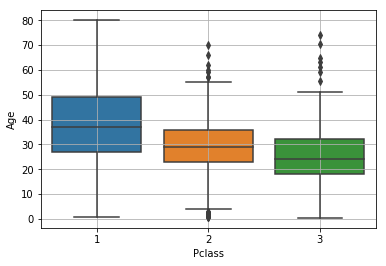

In [227]:
sns.boxplot(x='Pclass', y='Age', data = dados)
plt.grid()

In [228]:
def age(x):
    age = x[0]
    pclass = x[1]
    
    if np.isnan(age) == True:
        
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
    else:
        return age

dados['Age'] = dados[['Age','Pclass']].apply(age,axis=1)
#TEM QUE COLOCAR AXIS=1

In [229]:
dados.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500
5,0,3,0,24.0,8.4583
6,0,1,0,54.0,51.8625
7,0,3,0,2.0,21.0750
8,1,3,1,27.0,11.1333
9,1,2,1,14.0,30.0708


Verificar se há dados nulos

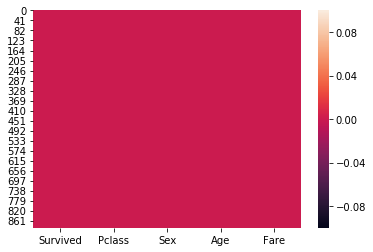

In [230]:
sns.heatmap(dados.isnull())

Agora, com os novos valores de idade, podemos ver se melhorou a relação com os sobreviventes

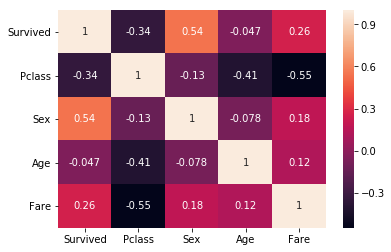

In [231]:
sns.heatmap(dados.corr(),annot = True)

Segue sendo baixo.

Talvez podemos até mesmo retirar a coluna Age

## Organizando valores

In [620]:
X = dados.drop('Survived',axis=1)
y = dados[['Survived']]

In [621]:
X.shape,y.shape

((891, 4), (891, 1))

In [622]:
X.head()

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


In [623]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


###### ajustando escala (normalização 0 até 1)

In [624]:
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

X = scaler.fit_transform(X)
# y já está 1 e 0

"""
#Caso queira usar o StandardScaler()
y = scaler.fit_transform(y)
df = pd.DataFrame()
df['Survived'] = y[:,0]
y = df"""

"\n#Caso queira usar o StandardScaler()\ny = scaler.fit_transform(y)\ndf = pd.DataFrame()\ndf['Survived'] = y[:,0]\ny = df"

#### Separar os dados de Treino e de Validação

In [625]:
from sklearn.model_selection import train_test_split

In [626]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size = 0.1,
    random_state = 0,
    shuffle = True,# Por ele embaralhar, lá na frente terei de resetar o índice dos y_train
    #para poder fazer comparação de acerto...
)

In [627]:
X_train.shape,y_train.shape

((801, 4), (801, 1))

#### Modelo, compilar e treinar

In [637]:
def creat_model(n):
    
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(
      units = n*1,
      activation = 'relu',
      input_shape = (X_train.shape[1],)
    ))

    model.add(tf.keras.layers.Dropout(0.1))
    
    model.add(tf.keras.layers.Dense(
      units = n*1.5,
      activation = 'relu',

    ))
    
    model.add(tf.keras.layers.Dropout(0.1))
    
    
    model.add(tf.keras.layers.Dense(
      units = n*2,
      activation = 'relu',

    ))
    
    model.add(tf.keras.layers.Dense(
      units = 1,
      activation = 'sigmoid',
    ))
    
    #model.summary()
    
    # Compilar
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
    
    return model

def treinar(model, epochs):

    history = model.fit(
      X_train,
      y_train,
      validation_split=0.1,
      epochs = epochs,
      shuffle = True,
      )
    return history

    #history.history.keys()

def cond(x):
    if x >= 0.5:
      return 1
    else:
      return 0

def predict(X,y,model):

    pred_train = model.predict(X)

    pred_df = pd.DataFrame()
    pred_df['pred'] = pred_train[:,0]

    pred_df['pred'] = pred_df['pred'].apply(cond)
    
    # Por causa daquele Shuffle definido no split, tenho que resetar os índices
    #Caso eu não faça isso, a função join entende que existirão valores
    # nulos!... Consequentemente, o índice de Acerto diminuirá
    y = y.reset_index().drop('index',axis=1)
    #--------------------------------------------------------------------

    y_train_pred = y.join(pred_df)

    k = 0
    total = len(y_train_pred['pred'])

    for x,y in zip(y_train_pred['pred'],y_train_pred['Survived']):
      if x == y:
          k = k+1
    p = k/total
    p_ = np.around(p*100,2)
    print(f"Porcentagem de Acerto {p_}%")
    return p_


##### Função plotar

In [638]:
def plot(history):

  plt.figure()
  plt.plot(history.history['accuracy'],'.r', label = 'acc',alpha = 0.3)
  plt.plot(history.history['val_accuracy'], '.b', label = 'acc_val',alpha = 0.3)
  plt.legend()
  plt.grid()

  plt.figure()
  plt.plot(history.history['loss'],'.r', label = 'loss',alpha = 0.3)
  plt.plot(history.history['val_loss'],'.b', label = 'loss_val',alpha = 0.3)
  plt.legend()
  plt.grid()

#### Rotina de Cálculo:
- varior o n (número de neurônios definido na função acima).


In [677]:
v ={}
for n in range(10,35,5):
    for epochs in range (10,31,5):
        
        #Aplicar as funções de Modelo e Treino
        model = creat_model(n)
        history= treinar(model,epochs)
        
        #v[0] = Porcentagem de acerto dos dados de treino
        #v[1] = Porcentagem de acerto dos dados de validacao
        #v[2] = History ( usado para fazer o plot)
        #v[3] = Model (usado para escolher qual modelo treinado irei aplicar)
        v[str(n)+'_'+str(epochs)] = [predict(X_train,y_train,model),predict(X_val,y_val,model),history,model]


Train on 720 samples, validate on 81 samples
Epoch 1/10
720/720 [==============================] - 1s 892us/sample - loss: 0.6710 - accuracy: 0.6431 - val_loss: 0.6867 - val_accuracy: 0.4938
Epoch 2/10
720/720 [==============================] - 0s 93us/sample - loss: 0.6400 - accuracy: 0.6792 - val_loss: 0.6796 - val_accuracy: 0.5926
Epoch 3/10
720/720 [==============================] - 0s 111us/sample - loss: 0.6162 - accuracy: 0.7056 - val_loss: 0.6610 - val_accuracy: 0.5926
Epoch 4/10
720/720 [==============================] - 0s 121us/sample - loss: 0.5779 - accuracy: 0.7375 - val_loss: 0.6233 - val_accuracy: 0.6667
Epoch 5/10
720/720 [==============================] - 0s 133us/sample - loss: 0.5425 - accuracy: 0.7833 - val_loss: 0.5807 - val_accuracy: 0.6667
Epoch 6/10
720/720 [==============================] - 0s 143us/sample - loss: 0.5167 - accuracy: 0.7722 - val_loss: 0.5304 - val_accuracy: 0.7778
Epoch 7/10
720/720 [==============================] - 0s 134us/sample - loss: 0.

Epoch 10/25
720/720 [==============================] - 0s 159us/sample - loss: 0.4877 - accuracy: 0.7861 - val_loss: 0.5112 - val_accuracy: 0.7778
Epoch 11/25
720/720 [==============================] - 0s 123us/sample - loss: 0.4808 - accuracy: 0.7722 - val_loss: 0.5329 - val_accuracy: 0.6667
Epoch 12/25
720/720 [==============================] - 0s 91us/sample - loss: 0.4707 - accuracy: 0.7875 - val_loss: 0.5137 - val_accuracy: 0.7778
Epoch 13/25
720/720 [==============================] - 0s 109us/sample - loss: 0.4777 - accuracy: 0.7722 - val_loss: 0.5177 - val_accuracy: 0.7778
Epoch 14/25
720/720 [==============================] - 0s 159us/sample - loss: 0.4860 - accuracy: 0.7681 - val_loss: 0.5205 - val_accuracy: 0.7778
Epoch 15/25
720/720 [==============================] - 0s 145us/sample - loss: 0.4745 - accuracy: 0.7833 - val_loss: 0.5314 - val_accuracy: 0.6667
Epoch 16/25
720/720 [==============================] - 0s 84us/sample - loss: 0.4737 - accuracy: 0.7722 - val_loss: 0.5

720/720 [==============================] - 0s 109us/sample - loss: 0.4654 - accuracy: 0.7944 - val_loss: 0.5053 - val_accuracy: 0.7037
Epoch 10/10
720/720 [==============================] - 0s 103us/sample - loss: 0.4595 - accuracy: 0.8083 - val_loss: 0.5261 - val_accuracy: 0.6790
Porcentagem de Acerto 79.53%
Porcentagem de Acerto 76.67%
Train on 720 samples, validate on 81 samples
Epoch 1/15
720/720 [==============================] - 1s 869us/sample - loss: 0.6815 - accuracy: 0.6042 - val_loss: 0.6730 - val_accuracy: 0.4938
Epoch 2/15
720/720 [==============================] - 0s 96us/sample - loss: 0.6359 - accuracy: 0.7069 - val_loss: 0.6389 - val_accuracy: 0.6420
Epoch 3/15
720/720 [==============================] - 0s 157us/sample - loss: 0.5911 - accuracy: 0.7542 - val_loss: 0.5971 - val_accuracy: 0.6667
Epoch 4/15
720/720 [==============================] - 0s 152us/sample - loss: 0.5365 - accuracy: 0.7833 - val_loss: 0.5503 - val_accuracy: 0.7901
Epoch 5/15
720/720 [============

Epoch 18/25
720/720 [==============================] - 0s 116us/sample - loss: 0.4443 - accuracy: 0.8056 - val_loss: 0.5069 - val_accuracy: 0.7284
Epoch 19/25
720/720 [==============================] - 0s 94us/sample - loss: 0.4587 - accuracy: 0.7931 - val_loss: 0.4965 - val_accuracy: 0.7284
Epoch 20/25
720/720 [==============================] - 0s 105us/sample - loss: 0.4504 - accuracy: 0.7931 - val_loss: 0.5128 - val_accuracy: 0.7037
Epoch 21/25
720/720 [==============================] - 0s 98us/sample - loss: 0.4459 - accuracy: 0.7958 - val_loss: 0.5091 - val_accuracy: 0.7160
Epoch 22/25
720/720 [==============================] - 0s 102us/sample - loss: 0.4696 - accuracy: 0.7917 - val_loss: 0.5062 - val_accuracy: 0.7160
Epoch 23/25
720/720 [==============================] - 0s 108us/sample - loss: 0.4507 - accuracy: 0.7986 - val_loss: 0.5132 - val_accuracy: 0.7037
Epoch 24/25
720/720 [==============================] - 0s 102us/sample - loss: 0.4549 - accuracy: 0.7931 - val_loss: 0.5

Epoch 7/15
720/720 [==============================] - 0s 102us/sample - loss: 0.4740 - accuracy: 0.7875 - val_loss: 0.5194 - val_accuracy: 0.7284
Epoch 8/15
720/720 [==============================] - 0s 89us/sample - loss: 0.4548 - accuracy: 0.7903 - val_loss: 0.5100 - val_accuracy: 0.7778
Epoch 9/15
720/720 [==============================] - 0s 100us/sample - loss: 0.4628 - accuracy: 0.7833 - val_loss: 0.5173 - val_accuracy: 0.7654
Epoch 10/15
720/720 [==============================] - 0s 91us/sample - loss: 0.4601 - accuracy: 0.7764 - val_loss: 0.5138 - val_accuracy: 0.7654
Epoch 11/15
720/720 [==============================] - 0s 107us/sample - loss: 0.4558 - accuracy: 0.7875 - val_loss: 0.5259 - val_accuracy: 0.6790
Epoch 12/15
720/720 [==============================] - 0s 102us/sample - loss: 0.4587 - accuracy: 0.7972 - val_loss: 0.5140 - val_accuracy: 0.7778
Epoch 13/15
720/720 [==============================] - 0s 96us/sample - loss: 0.4629 - accuracy: 0.7819 - val_loss: 0.5341 

720/720 [==============================] - 1s 891us/sample - loss: 0.6758 - accuracy: 0.5708 - val_loss: 0.6450 - val_accuracy: 0.6420
Epoch 2/30
720/720 [==============================] - 0s 101us/sample - loss: 0.6008 - accuracy: 0.7833 - val_loss: 0.5946 - val_accuracy: 0.6667
Epoch 3/30
720/720 [==============================] - 0s 105us/sample - loss: 0.5242 - accuracy: 0.7764 - val_loss: 0.5418 - val_accuracy: 0.6790
Epoch 4/30
720/720 [==============================] - 0s 98us/sample - loss: 0.4847 - accuracy: 0.7889 - val_loss: 0.5320 - val_accuracy: 0.6667
Epoch 5/30
720/720 [==============================] - 0s 115us/sample - loss: 0.4653 - accuracy: 0.7833 - val_loss: 0.5162 - val_accuracy: 0.6790
Epoch 6/30
720/720 [==============================] - 0s 116us/sample - loss: 0.4563 - accuracy: 0.7875 - val_loss: 0.5139 - val_accuracy: 0.7037
Epoch 7/30
720/720 [==============================] - 0s 104us/sample - loss: 0.4457 - accuracy: 0.7986 - val_loss: 0.5177 - val_accurac

Porcentagem de Acerto 79.15%
Porcentagem de Acerto 75.56%
Train on 720 samples, validate on 81 samples
Epoch 1/20
720/720 [==============================] - 1s 1ms/sample - loss: 0.6561 - accuracy: 0.6486 - val_loss: 0.6662 - val_accuracy: 0.4938
Epoch 2/20
720/720 [==============================] - 0s 98us/sample - loss: 0.5891 - accuracy: 0.7056 - val_loss: 0.6055 - val_accuracy: 0.6667
Epoch 3/20
720/720 [==============================] - 0s 115us/sample - loss: 0.5262 - accuracy: 0.7875 - val_loss: 0.5477 - val_accuracy: 0.7901
Epoch 4/20
720/720 [==============================] - 0s 111us/sample - loss: 0.4986 - accuracy: 0.8028 - val_loss: 0.5070 - val_accuracy: 0.7778
Epoch 5/20
720/720 [==============================] - 0s 119us/sample - loss: 0.4954 - accuracy: 0.7875 - val_loss: 0.5112 - val_accuracy: 0.7778
Epoch 6/20
720/720 [==============================] - 0s 149us/sample - loss: 0.4891 - accuracy: 0.7764 - val_loss: 0.5335 - val_accuracy: 0.6667
Epoch 7/20
720/720 [====

Epoch 10/30
720/720 [==============================] - 0s 87us/sample - loss: 0.4598 - accuracy: 0.8042 - val_loss: 0.5115 - val_accuracy: 0.6790
Epoch 11/30
720/720 [==============================] - 0s 95us/sample - loss: 0.4578 - accuracy: 0.7944 - val_loss: 0.5139 - val_accuracy: 0.6790
Epoch 12/30
720/720 [==============================] - 0s 99us/sample - loss: 0.4492 - accuracy: 0.7958 - val_loss: 0.5216 - val_accuracy: 0.6667
Epoch 13/30
720/720 [==============================] - 0s 99us/sample - loss: 0.4551 - accuracy: 0.7861 - val_loss: 0.5098 - val_accuracy: 0.6790
Epoch 14/30
720/720 [==============================] - 0s 106us/sample - loss: 0.4399 - accuracy: 0.7958 - val_loss: 0.5024 - val_accuracy: 0.7037
Epoch 15/30
720/720 [==============================] - 0s 87us/sample - loss: 0.4405 - accuracy: 0.8042 - val_loss: 0.5303 - val_accuracy: 0.6790
Epoch 16/30
720/720 [==============================] - 0s 103us/sample - loss: 0.4553 - accuracy: 0.7958 - val_loss: 0.5024

Epoch 9/20
720/720 [==============================] - 0s 100us/sample - loss: 0.4541 - accuracy: 0.8083 - val_loss: 0.5035 - val_accuracy: 0.7160
Epoch 10/20
720/720 [==============================] - 0s 92us/sample - loss: 0.4460 - accuracy: 0.7931 - val_loss: 0.5132 - val_accuracy: 0.7037
Epoch 11/20
720/720 [==============================] - 0s 105us/sample - loss: 0.4444 - accuracy: 0.7958 - val_loss: 0.4900 - val_accuracy: 0.7778
Epoch 12/20
720/720 [==============================] - 0s 101us/sample - loss: 0.4393 - accuracy: 0.8097 - val_loss: 0.5211 - val_accuracy: 0.6790
Epoch 13/20
720/720 [==============================] - 0s 117us/sample - loss: 0.4444 - accuracy: 0.7986 - val_loss: 0.4963 - val_accuracy: 0.7778
Epoch 14/20
720/720 [==============================] - 0s 108us/sample - loss: 0.4420 - accuracy: 0.7931 - val_loss: 0.5301 - val_accuracy: 0.6790
Epoch 15/20
720/720 [==============================] - 0s 92us/sample - loss: 0.4411 - accuracy: 0.7833 - val_loss: 0.50

720/720 [==============================] - 0s 117us/sample - loss: 0.4419 - accuracy: 0.7917 - val_loss: 0.5050 - val_accuracy: 0.7160
Epoch 19/30
720/720 [==============================] - 0s 106us/sample - loss: 0.4453 - accuracy: 0.7819 - val_loss: 0.5024 - val_accuracy: 0.7160
Epoch 20/30
720/720 [==============================] - 0s 99us/sample - loss: 0.4369 - accuracy: 0.8069 - val_loss: 0.5063 - val_accuracy: 0.7160
Epoch 21/30
720/720 [==============================] - 0s 102us/sample - loss: 0.4350 - accuracy: 0.8042 - val_loss: 0.5094 - val_accuracy: 0.7160
Epoch 22/30
720/720 [==============================] - 0s 117us/sample - loss: 0.4432 - accuracy: 0.7958 - val_loss: 0.5075 - val_accuracy: 0.7160
Epoch 23/30
720/720 [==============================] - 0s 90us/sample - loss: 0.4408 - accuracy: 0.8083 - val_loss: 0.5108 - val_accuracy: 0.7037
Epoch 24/30
720/720 [==============================] - 0s 99us/sample - loss: 0.4288 - accuracy: 0.8056 - val_loss: 0.4938 - val_acc

In [679]:
#v

In [678]:
for k in v.keys():
    print(k)
    predict(X,y_comparar_fim,v[k][3])
    
#neurônio/época

10_10
Porcentagem de Acerto 79.01%
10_15
Porcentagem de Acerto 78.79%
10_20
Porcentagem de Acerto 79.01%
10_25
Porcentagem de Acerto 78.45%
10_30
Porcentagem de Acerto 79.24%
15_10
Porcentagem de Acerto 79.24%
15_15
Porcentagem de Acerto 80.47%
15_20
Porcentagem de Acerto 78.9%
15_25
Porcentagem de Acerto 78.9%
15_30
Porcentagem de Acerto 79.01%
20_10
Porcentagem de Acerto 79.69%
20_15
Porcentagem de Acerto 79.12%
20_20
Porcentagem de Acerto 78.79%
20_25
Porcentagem de Acerto 79.46%
20_30
Porcentagem de Acerto 79.35%
25_10
Porcentagem de Acerto 79.35%
25_15
Porcentagem de Acerto 78.79%
25_20
Porcentagem de Acerto 79.35%
25_25
Porcentagem de Acerto 79.57%
25_30
Porcentagem de Acerto 80.47%
30_10
Porcentagem de Acerto 78.9%
30_15
Porcentagem de Acerto 79.35%
30_20
Porcentagem de Acerto 79.46%
30_25
Porcentagem de Acerto 80.13%
30_30
Porcentagem de Acerto 79.35%


In [641]:
#plot(v['20'][2])

# Predictions dos dados de Teste

Importar dados

In [680]:
dados_test = pd.read_csv('./test.csv')

dados_x_test = dados_test[UTILIZADOS[1:]]#tirar o Survived


#dados_x_test = dados_test.drop(RETIRAR,axis =1)
#dados_y_test = Não sabemos... eles não disponibilizam

In [681]:
dados_x_test.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


Aplicar a condição do sex

In [682]:
dados_x_test['Sex'] = dados_x_test['Sex'].apply(sex)


#dados_x_test = pd.get_dummies(dados_x_test)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [683]:
dados_x_test

,Pclass,Sex,Age,Fare
0,3,0,34.5,7.8292
1,3,1,47.0,7.0000
2,2,0,62.0,9.6875
3,3,0,27.0,8.6625
4,3,1,22.0,12.2875
5,3,0,14.0,9.2250
6,3,1,30.0,7.6292
7,2,0,26.0,29.0000
8,3,1,18.0,7.2292
9,3,0,21.0,24.1500


Breve análise de correlação dos dados

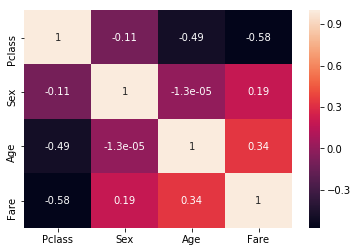

In [684]:
sns.heatmap(dados_x_test.corr(),annot=True)

Verificar se há valores Null

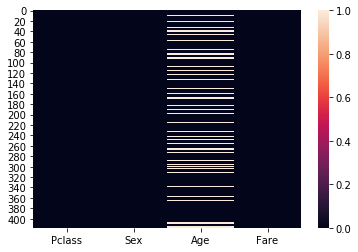

In [685]:
sns.heatmap(dados_x_test.isnull())

Através das classes, vamos tentar prever as idades das pessoas através da mediana usando o boxplot

"plt.figure(figsize=(15,15))\nsns.boxplot(x='Pclass', y='Age', data = dados_x_test)\nplt.grid()\nplt.yticks(np.arange(0, 70, step=1))"

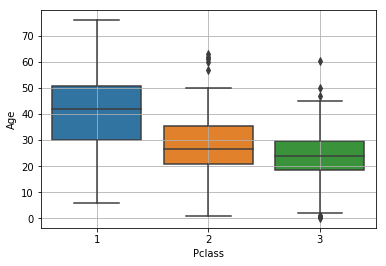

In [686]:
sns.boxplot(x='Pclass', y='Age', data = dados_x_test)
plt.grid()

"""plt.figure(figsize=(15,15))
sns.boxplot(x='Pclass', y='Age', data = dados_x_test)
plt.grid()
plt.yticks(np.arange(0, 70, step=1))"""

Como os dados mudaram, deve-se novamente crir uma função para substituir os null

In [687]:
def age_new(x):
    age = x[0]
    pclass = x[1]
    
    if np.isnan(age) == True:
        
        if pclass == 1:
            return 42
        elif pclass == 2:
            return 27
        elif pclass == 3:
            return 24
    else:
        return age
    
dados_x_test['Age'] = dados_x_test[['Age','Pclass']].apply(age_new,axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Verificar se há Null

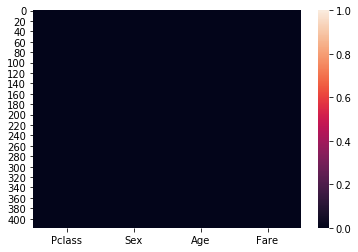

In [688]:
sns.heatmap(dados_x_test.isnull())

Normalizar dados

In [689]:
dados_x_test = scaler.fit_transform(dados_x_test)

Selecional o melhor modelo para fazer previsão

In [690]:
prev_env = v['25_30'][3].predict(dados_x_test)

Adicionar as predictions em um DataFrame

In [52]:
dados_env = pd.DataFrame()
dados_env['PassengerId'] = dados_test['PassengerId']
dados_env['Survived'] = prev_env[:,0]

Aplicar condição de 0 e 1

In [691]:
dados_env['Survived'] = dados_env['Survived'].apply(cond)

In [53]:
#dados_env.head(20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70584cc2b0>]],
      dtype=object)

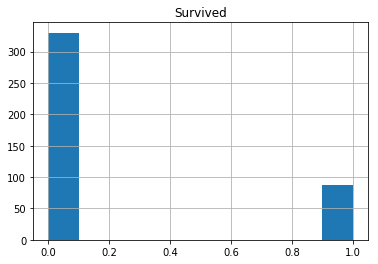

In [54]:
dados_env.hist('Survived') # Está Coerente

In [58]:
#Salvar dados

dados_env.to_csv('./Attempt_3_Titanic_Predictions.csv',index=False)

